In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
idf = pd.read_csv('cardio_train.csv')

In [4]:
idf

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [5]:
#fix the data
columns = "id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio;bias".split(';')
df = pd.DataFrame(index=range(70000), columns=columns, dtype=np.float64)

In [6]:
for i in range(70000):
    r = idf.iloc[i][0].split(';')
    for j in range(len(r)):
        df.iloc[i][columns[j]] = float(r[j])

In [7]:
df = df.drop(['id'], axis=1)

In [8]:
df.bias = 1.0

In [9]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bias
0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0
2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0
3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
69996,22601.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0
69997,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0
69998,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0


In [10]:
#one hot encoding
df2 = pd.get_dummies(df, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [11]:
df2

,age,height,weight,ap_hi,ap_lo,bias,gender_1.0,gender_2.0,cholesterol_1.0,cholesterol_2.0,...,gluc_2.0,gluc_3.0,smoke_0.0,smoke_1.0,alco_0.0,alco_1.0,active_0.0,active_1.0,cardio_0.0,cardio_1.0
0,18393.0,168.0,62.0,110.0,80.0,1.0,0,1,1,0,...,0,0,1,0,1,0,0,1,1,0
1,20228.0,156.0,85.0,140.0,90.0,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,18857.0,165.0,64.0,130.0,70.0,1.0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,17623.0,169.0,82.0,150.0,100.0,1.0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
4,17474.0,156.0,56.0,100.0,60.0,1.0,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120.0,80.0,1.0,0,1,1,0,...,0,0,0,1,1,0,0,1,1,0
69996,22601.0,158.0,126.0,140.0,90.0,1.0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
69997,19066.0,183.0,105.0,180.0,90.0,1.0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
69998,22431.0,163.0,72.0,135.0,80.0,1.0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [12]:
#convert to numpy for easier processing
features = np.array(df2.drop(['cardio_1.0', 'cardio_0.0'], axis=1))
labels = np.array(df2.iloc[:, -2:])

In [13]:
features.shape

(70000, 20)

In [14]:
labels.shape

(70000, 2)

In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-10-07 17:15:29.321674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [16]:
#separate test and training data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.1)

In [21]:
#to test real accuracy
def realAccuracy(p, y_test):
    preds = p[:]
    for i in range(len(preds)):
        if preds[i][0] > preds[i][1]:
            preds[i][0] = 1
            preds[i][1] = 0
        else:
            preds[i][0] = 0
            preds[i][1] = 1
    return accuracy_score(y_test, preds)
        
    

In [22]:
#use a neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(features.shape[1],)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
    
])


In [23]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()


In [24]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1969/1969 [==============================] - 9s 4ms/step - loss: 33.0705 - accuracy: 0.5118
Epoch 2/10
1969/1969 [==============================] - 7s 3ms/step - loss: 16.1818 - accuracy: 0.5381
Epoch 3/10
1969/1969 [==============================] - 8s 4ms/step - loss: 10.3177 - accuracy: 0.5809
Epoch 4/10
1969/1969 [==============================] - 8s 4ms/step - loss: 10.6206 - accuracy: 0.5840
Epoch 5/10
1969/1969 [==============================] - 8s 4ms/step - loss: 10.1521 - accuracy: 0.5894
Epoch 6/10
1969/1969 [==============================] - 8s 4ms/step - loss: 10.1021 - accuracy: 0.5839
Epoch 7/10
1969/1969 [==============================] - 11s 6ms/step - loss: 8.3330 - accuracy: 0.6009
Epoch 8/10
1969/1969 [==============================] - 8s 4ms/step - loss: 8.4068 - accuracy: 0.5967
Epoch 9/10
1969/1969 [==============================] - 8s 4ms/step - loss: 9.1902 - accuracy: 0.5913
Epoch 10/10
1969/1969 [==============================] - 8s 4ms/step - loss

In [20]:
model.evaluate(x_test,  y_test, verbose=2)


219/219 - 1s - loss: 11.3488 - accuracy: 0.5079 - 639ms/epoch - 3ms/step


[11.348836898803711, 0.5078571438789368]

In [27]:
realAccuracy(model.predict(x_test), y_test)

219/219 [==============================] - 1s 4ms/step


0.49614285714285716

In [50]:
#simpler model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='softmax', input_shape=(features.shape[1],))
])

In [51]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [52]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1969/1969 [==============================] - 8s 4ms/step - loss: 286.0416 - accuracy: 0.6312
Epoch 2/10
1969/1969 [==============================] - 6s 3ms/step - loss: 2.0402 - accuracy: 0.6631
Epoch 3/10
1969/1969 [==============================] - 7s 3ms/step - loss: 1.5515 - accuracy: 0.6481
Epoch 4/10
1969/1969 [==============================] - 7s 3ms/step - loss: 1.2329 - accuracy: 0.6402
Epoch 5/10
1969/1969 [==============================] - 7s 4ms/step - loss: 1.3749 - accuracy: 0.6102
Epoch 6/10
1969/1969 [==============================] - 7s 4ms/step - loss: 1.1865 - accuracy: 0.6197
Epoch 7/10
1969/1969 [==============================] - 7s 3ms/step - loss: 1.2333 - accuracy: 0.6153
Epoch 8/10
1969/1969 [==============================] - 5s 3ms/step - loss: 1.2902 - accuracy: 0.6043
Epoch 9/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.1966 - accuracy: 0.6154
Epoch 10/10
1969/1969 [==============================] - 6s 3ms/step - loss: 1.2

In [53]:
model2.evaluate(x_test,  y_test, verbose=2)


219/219 - 1s - loss: 0.7476 - accuracy: 0.6697 - 579ms/epoch - 3ms/step


[0.7476459741592407, 0.6697142720222473]

In [54]:
realAccuracy(model2.predict(x_test), y_test)

219/219 [==============================] - 0s 2ms/step


0.6697142857142857

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#use a decision tree
tree = DecisionTreeClassifier().fit(x_train, y_train)

In [35]:
tree.score(x_test, y_test)

0.6391428571428571

In [36]:
realAccuracy(tree.predict(x_test), y_test)

0.6392857142857142

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#try a linear model
lin = LinearRegression().fit(x_train, y_train)

In [39]:
lin.score(x_train, y_train)

0.12015249590226518

In [40]:
realAccuracy(lin.predict(x_test), y_test)

0.6507142857142857

In [41]:
lin.coef_

array([[-4.05948829e-05,  2.03722050e-03, -5.29525132e-03,
        -1.51659982e-04, -1.30351588e-04,  0.00000000e+00,
         9.41026344e-03, -9.41026344e-03,  1.31066368e-01,
         6.82199722e-03, -1.37888365e-01, -1.95052474e-02,
        -3.33402679e-02,  5.28455153e-02, -1.12527950e-02,
         1.12527950e-02, -1.55201054e-02,  1.55201054e-02,
        -2.01084776e-02,  2.01084776e-02],
       [ 4.05948829e-05, -2.03722050e-03,  5.29525132e-03,
         1.51659982e-04,  1.30351588e-04, -2.77555756e-17,
        -9.41026344e-03,  9.41026344e-03, -1.31066368e-01,
        -6.82199722e-03,  1.37888365e-01,  1.95052474e-02,
         3.33402679e-02, -5.28455153e-02,  1.12527950e-02,
        -1.12527950e-02,  1.55201054e-02, -1.55201054e-02,
         2.01084776e-02, -2.01084776e-02]])

In [42]:
#deeper neural net
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

loss_fn = tf.keras.losses.CategoricalCrossentropy() #the other one seems to get stuck at .6

model3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [43]:
model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1969/1969 [==============================] - 12s 5ms/step - loss: 1.0255 - accuracy: 0.5137
Epoch 2/20
1969/1969 [==============================] - 10s 5ms/step - loss: 0.7397 - accuracy: 0.5337
Epoch 3/20
1969/1969 [==============================] - 9s 5ms/step - loss: 0.7164 - accuracy: 0.5538
Epoch 4/20
1969/1969 [==============================] - 9s 5ms/step - loss: 0.6775 - accuracy: 0.5746
Epoch 5/20
1969/1969 [==============================] - 9s 5ms/step - loss: 0.6750 - accuracy: 0.5791
Epoch 6/20
1969/1969 [==============================] - 11s 6ms/step - loss: 0.6653 - accuracy: 0.5981
Epoch 7/20
1969/1969 [==============================] - 12s 6ms/step - loss: 0.6509 - accuracy: 0.6253
Epoch 8/20
1969/1969 [==============================] - 11s 5ms/step - loss: 0.6331 - accuracy: 0.6515
Epoch 9/20
1969/1969 [==============================] - 11s 5ms/step - loss: 0.6099 - accuracy: 0.6795
Epoch 10/20
1969/1969 [==============================] - 10s 5ms/step - loss

In [44]:
model3.evaluate(x_test, y_test, verbose=2)

219/219 - 2s - loss: 0.5693 - accuracy: 0.7150 - 2s/epoch - 8ms/step


[0.5693133473396301, 0.7149999737739563]

In [45]:
realAccuracy(model3.predict(x_test), y_test)

219/219 [==============================] - 2s 8ms/step


0.715

In [46]:
#Super overfitting 9000
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

loss_fn = tf.keras.losses.CategoricalCrossentropy() #the other one seems to get stuck at .6

model4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [47]:
model4.fit(x_train, y_train, epochs=25)

Epoch 1/25
1969/1969 [==============================] - 23s 11ms/step - loss: 0.9266 - accuracy: 0.5172
Epoch 2/25
1969/1969 [==============================] - 20s 10ms/step - loss: 0.6891 - accuracy: 0.5527
Epoch 3/25
1969/1969 [==============================] - 19s 10ms/step - loss: 0.6784 - accuracy: 0.5703
Epoch 4/25
1969/1969 [==============================] - 17s 9ms/step - loss: 0.6765 - accuracy: 0.5771
Epoch 5/25
1969/1969 [==============================] - 19s 10ms/step - loss: 0.6664 - accuracy: 0.5941
Epoch 6/25
1969/1969 [==============================] - 21s 10ms/step - loss: 0.6588 - accuracy: 0.6082
Epoch 7/25
1969/1969 [==============================] - 21s 11ms/step - loss: 0.6291 - accuracy: 0.6541
Epoch 8/25
1969/1969 [==============================] - 20s 10ms/step - loss: 0.6031 - accuracy: 0.6803
Epoch 9/25
1969/1969 [==============================] - 21s 11ms/step - loss: 0.5956 - accuracy: 0.6890
Epoch 10/25
1969/1969 [==============================] - 20s 10ms

In [48]:
model4.evaluate(x_test, y_test, verbose=2)

219/219 - 1s - loss: 0.5608 - accuracy: 0.7244 - 1s/epoch - 6ms/step


[0.5607500076293945, 0.7244285941123962]

In [49]:
realAccuracy(model4.predict(x_test), y_test)

219/219 [==============================] - 1s 3ms/step


0.7244285714285714

In [101]:
#format to html table
for i in range(len(df2.keys())-2):
    print("<tr><td>"+str(df2.keys()[i]) + "</td><td>"+str(lin.coef_[1][i])+"</td></tr>")

<tr><td>age</td><td>4.053085692451839e-05</td></tr>
<tr><td>height</td><td>-0.002199727538384587</td></tr>
<tr><td>weight</td><td>0.005236159973421485</td></tr>
<tr><td>ap_hi</td><td>0.00012233625034142968</td></tr>
<tr><td>ap_lo</td><td>0.0001346943013636262</td></tr>
<tr><td>bias</td><td>-2.7755575615628914e-17</td></tr>
<tr><td>gender_1.0</td><td>-0.009420578045095069</td></tr>
<tr><td>gender_2.0</td><td>0.009420578045095303</td></tr>
<tr><td>cholesterol_1.0</td><td>-0.1319955936598206</td></tr>
<tr><td>cholesterol_2.0</td><td>-0.008311666782551444</td></tr>
<tr><td>cholesterol_3.0</td><td>0.14030726044237296</td></tr>
<tr><td>gluc_1.0</td><td>0.018213876065008967</td></tr>
<tr><td>gluc_2.0</td><td>0.036562588385340496</td></tr>
<tr><td>gluc_3.0</td><td>-0.05477646445034874</td></tr>
<tr><td>smoke_0.0</td><td>0.01132686572031567</td></tr>
<tr><td>smoke_1.0</td><td>-0.011326865720315521</td></tr>
<tr><td>alco_0.0</td><td>0.014097090074477079</td></tr>
<tr><td>alco_1.0</td><td>-0.0140

In [56]:
#format to html table
for i in range(len(df2.keys())-2):
    print("<tr><td>"+str(df2.keys()[i]) + "</td><td>"+str(lin.coef_[1][i] * df2.std()[i])+"</td></tr>")

<tr><td>age</td><td>0.10015779251483298</td></tr>
<tr><td>height</td><td>-0.01672583774828929</td></tr>
<tr><td>weight</td><td>0.0762291495900712</td></tr>
<tr><td>ap_hi</td><td>0.023357369081896746</td></tr>
<tr><td>ap_lo</td><td>0.024567693684885206</td></tr>
<tr><td>bias</td><td>-0.0</td></tr>
<tr><td>gender_1.0</td><td>-0.004487171346387677</td></tr>
<tr><td>gender_2.0</td><td>0.0044871713463877205</td></tr>
<tr><td>cholesterol_1.0</td><td>-0.05687758193904838</td></tr>
<tr><td>cholesterol_2.0</td><td>-0.0023415168717751816</td></tr>
<tr><td>cholesterol_3.0</td><td>0.044027736489386016</td></tr>
<tr><td>gluc_1.0</td><td>0.006970547082426762</td></tr>
<tr><td>gluc_2.0</td><td>0.00873532036010831</td></tr>
<tr><td>gluc_3.0</td><td>-0.01401734018288539</td></tr>
<tr><td>smoke_0.0</td><td>0.003189985272057267</td></tr>
<tr><td>smoke_1.0</td><td>-0.003189985272057256</td></tr>
<tr><td>alco_0.0</td><td>0.003500834529926736</td></tr>
<tr><td>alco_1.0</td><td>-0.0035008345299267656</td></t

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'x[3] <= 129.5\ngini = 0.5\nsamples = 63000\nvalue = [[31506, 31494]\n[31494, 31506]]'),
 Text(0.25, 0.5, 'x[0] <= 20130.0\ngini = 0.434\nsamples = 37138\nvalue = [[11803, 25335]\n[25335, 11803]]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[3] <= 138.5\ngini = 0.363\nsamples = 25862\nvalue = [[19703, 6159]\n[6159, 19703]]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

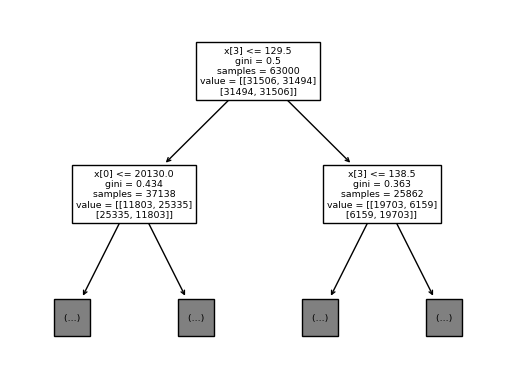

In [58]:
plot_tree(tree, max_depth=1)

In [141]:
df2.keys()

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bias', 'gender_1.0',
       'gender_2.0', 'cholesterol_1.0', 'cholesterol_2.0', 'cholesterol_3.0',
       'gluc_1.0', 'gluc_2.0', 'gluc_3.0', 'smoke_0.0', 'smoke_1.0',
       'alco_0.0', 'alco_1.0', 'active_0.0', 'active_1.0', 'cardio_0.0',
       'cardio_1.0'],
      dtype='object')